# Basil & Cup Segmentation Metrics

Run the segmentation pipeline on a labeled image (e.g., `P1T1D1.jpg`), inspect the masks, and export freshness metrics to CSV.


In [1]:
import sys
from pathlib import Path

def find_project_root(start: Path) -> Path:
    for path in [start] + list(start.parents):
        if (path / "src").is_dir():
            return path
    raise FileNotFoundError("Could not locate project root containing 'src'.")

PROJECT_ROOT = find_project_root(Path.cwd())
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import matplotlib.pyplot as plt
import pandas as pd

from src.segmentation import run_pipeline, save_metrics_csv


In [4]:
IMAGE_ID = "P2T0D0"  # update as needed (P{i}T{j}D{k})
IMAGE_PATH = PROJECT_ROOT / "Images" / f"{IMAGE_ID}.jpg"
METRICS_DIR = PROJECT_ROOT / "metrics"

if not IMAGE_PATH.exists():
    raise FileNotFoundError(
        "Update IMAGE_ID so it matches a file in Images/. Current value: "
        f"{IMAGE_PATH.resolve()}"
    )

result = run_pipeline(IMAGE_PATH, grabcut=True)
result.metrics


basil_pixels         1.874133e+06
coverage_fraction    1.537086e-01
mean_R               1.144141e+02
mean_G               1.712571e+02
mean_B               1.035760e+02
std_R                3.890594e+01
std_G                5.120530e+01
std_B                6.238339e+01
mean_hue_deg         1.132168e+02
mean_saturation      1.275494e+02
mean_value           1.713201e+02
std_saturation       5.325850e+01
std_value            5.109516e+01
mean_lab_L           1.644467e+02
mean_lab_a          -3.066298e+01
mean_lab_b           2.860813e+01
freshness_index      4.236638e-01
dtype: float64

,value
basil_pixels,1.874133e+06
coverage_fraction,1.537086e-01
mean_R,1.144141e+02
mean_G,1.712571e+02
mean_B,1.035760e+02
std_R,3.890594e+01
std_G,5.120530e+01
std_B,6.238339e+01
mean_hue_deg,1.132168e+02
mean_saturation,1.275494e+02


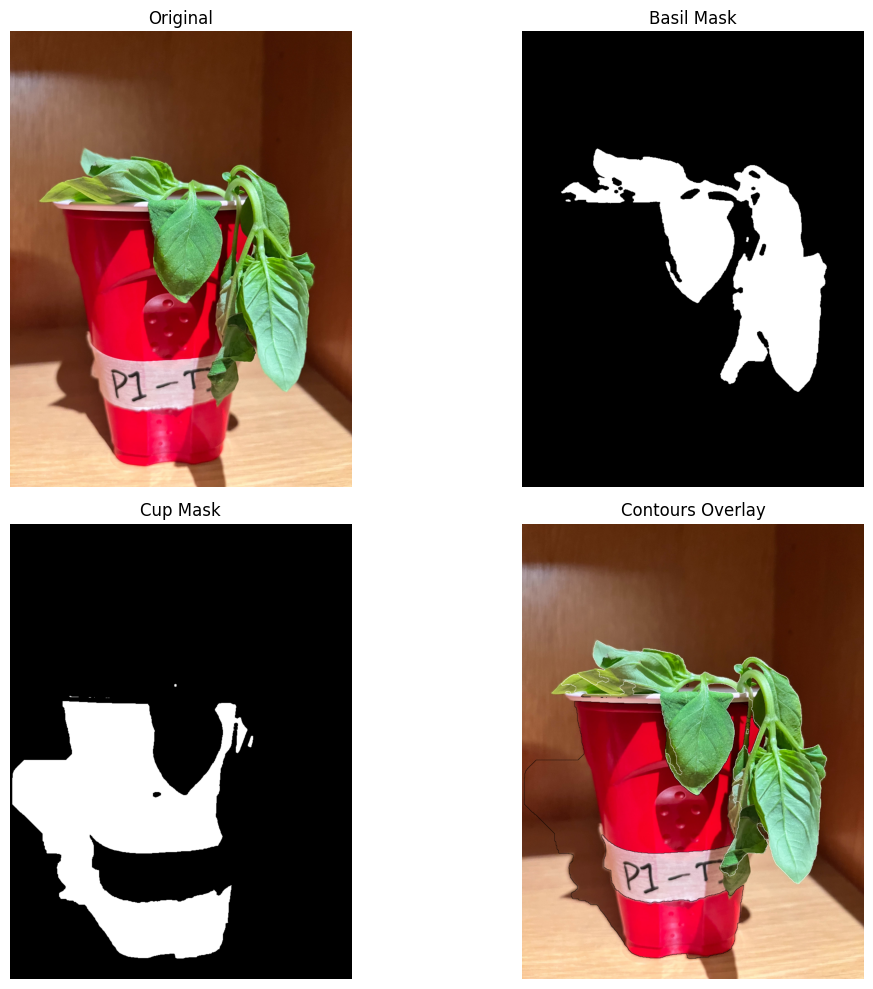

In [5]:
display(result.metrics.to_frame("value"))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

axes[0].imshow(result.image_rgb)
axes[0].set_title("Original")

axes[1].imshow(result.basil_mask, cmap="gray")
axes[1].set_title("Basil Mask")

axes[2].imshow(result.cup_mask, cmap="gray")
axes[2].set_title("Cup Mask")

axes[3].imshow(result.overlay)
axes[3].set_title("Contours Overlay")

for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
csv_path = METRICS_DIR / f"{IMAGE_ID}.csv"
save_metrics_csv(result.metrics, IMAGE_ID, csv_path)
csv_path

In [13]:
all_metrics = []
for image_path in sorted((PROJECT_ROOT / "Images").glob("P*T*D*.png")):
    try:
        res = run_pipeline(image_path, grabcut=True)
        csv_path = METRICS_DIR / f"{image_path.stem}.csv"
        save_metrics_csv(res.metrics, image_path.stem, csv_path)
        series = res.metrics.copy()
        series.name = image_path.stem
        all_metrics.append(series)
    except: # skip images that cause errors
        print(f"Skipping {image_path.name} due to error.")
        continue

pd.DataFrame(all_metrics)

Skipping P1T2D4.png due to error.
Skipping P1T2D5.png due to error.
Skipping P2T1D2.png due to error.
Skipping P2T1D3.png due to error.
Skipping P2T1D4.png due to error.
Skipping P2T2D3.png due to error.
Skipping P2T2D4.png due to error.
Skipping P2T2D5.png due to error.
Skipping P2T4D5.png due to error.
Skipping P3T1D4.png due to error.
Skipping P3T1D5.png due to error.
Skipping P3T2D4.png due to error.


,basil_pixels,coverage_fraction,mean_R,mean_G,mean_B,std_R,std_G,std_B,mean_hue_deg,mean_saturation,mean_value,std_saturation,std_value,mean_lab_L,mean_lab_a,mean_lab_b,freshness_index
P1T0D0,781908.0,0.064129,95.337064,143.177214,96.408402,51.998057,68.448644,61.636833,118.946070,119.176986,143.468055,54.465702,68.340451,137.821139,-25.023536,19.684400,0.380537
P1T1D1,123450.0,0.010125,165.883823,179.797513,138.844836,33.536300,34.532267,39.625589,81.562414,61.549413,179.797554,23.210659,34.532282,181.216347,-12.027420,19.468846,0.347924
P1T1D2,1321.0,0.000108,142.361847,151.781226,122.813777,40.386579,41.844525,40.886044,79.420136,53.884936,151.786525,25.448327,41.848523,155.392884,-8.676003,14.211961,0.300233
P1T1D3,60438.0,0.004957,177.426371,193.889788,143.198120,27.948400,28.699941,29.151896,79.916311,67.607747,193.891790,20.111005,28.696334,193.690973,-14.255502,23.680664,0.372900
P1T1D4,7394.0,0.000606,134.145929,141.168380,106.836354,26.854459,27.444555,25.356933,72.210982,63.912497,141.168380,13.833677,27.444555,145.765080,-8.700162,17.522315,0.294101
P1T1D5,16.0,0.000001,107.687500,109.375000,90.812500,6.191918,7.279037,6.775127,65.875000,44.375000,109.875000,3.919104,6.575285,116.250000,-4.375000,10.000000,0.225428
P1T2D1,1698926.0,0.139339,60.125612,72.267291,28.262325,18.951440,19.776010,18.500122,78.638448,162.984169,72.268186,47.564454,19.777819,72.820847,-12.619208,23.886381,0.331406
P1T2D2,463765.0,0.038036,48.394180,59.424775,23.934488,16.703081,20.373260,19.145067,80.362123,163.403196,59.425851,51.872446,20.373742,58.886621,-11.044535,19.491680,0.318839
P1T2D3,244899.0,0.020086,53.854826,64.505302,41.141965,12.115779,15.433872,19.170593,93.196697,101.491239,64.505580,46.818179,15.434263,65.520606,-9.034974,12.771918,0.240273
P1T3D1,1993771.0,0.163521,89.994162,132.866254,72.734790,35.457952,47.415185,43.822400,103.787407,129.200569,132.873625,45.360293,47.413108,129.105210,-26.192902,27.481166,0.367808


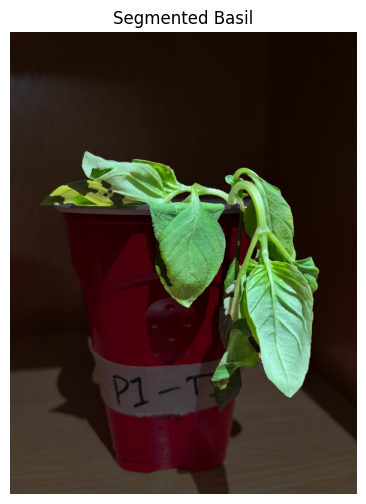

In [11]:
import numpy as np
# Overlay original with basil segmentation (non-basil tinted)
rgb = result.image_rgb
mask = (result.basil_mask > 0).astype(np.uint8)
overlay = rgb.copy()
tinted = (overlay * 0.3).astype(np.uint8)
overlay[mask == 0] = tinted[mask == 0]
plt.figure(figsize=(6, 6))
plt.imshow(overlay)
plt.title('Segmented Basil')
plt.axis('off')
plt.show()
